In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import array
from numpy import newaxis
import math
from scipy import stats
from subprocess import check_output
import seaborn as sns
# from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import load_model


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [359]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [422]:
#load your data to train or predict on 
raw_data = pd.read_csv("big_df_adj.csv", low_memory=False)



In [419]:

cols = [c for c in raw_data.columns if c.lower()[-1] == "s"]
df = raw_data[cols]


In [423]:
data_frame = df.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame = data_frame.sort_index(ascending=True, axis=1)
data_frame = data_frame.reindex(index=data_frame.index[::-1])
data_frame.columns


Index(['CBOE_VX1_FWs', 'CME_AD1_FWs', 'CME_BO1_FWs', 'CME_BP1_FWs',
       'CME_C1_FWs', 'CME_CD1_FWs', 'CME_CL1_FWs', 'CME_FV1_FWs',
       'CME_HO1_FWs', 'CME_JY1_FWs', 'CME_LB1_FWs', 'CME_LC1_FWs',
       'CME_MP1_FWs', 'CME_NG1_FWs', 'CME_RB1_FWs', 'CME_RR1_FWs',
       'CME_S1_FWs', 'CME_SF1_FWs', 'CME_US1_FWs', 'CME_W1_FWs',
       'ICE_ATW1_FWs', 'ICE_B1_FWs', 'ICE_G1_FWs', 'ICE_M1_FWs', 'ICE_O1_FWs',
       'ICE_SB1_FWs', 'ICE_T1_FWs'],
      dtype='object')

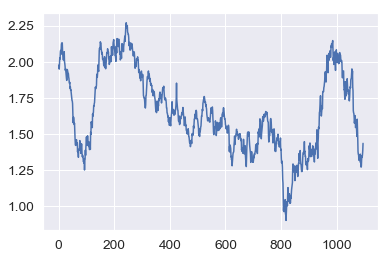

In [428]:
plt.plot((data_frame["CME_RB1_FWs"]))


In [8]:
h = "CME_RB1_FWs"
h[-1]
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]


In [9]:
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]
a_df = data_frame[cols]


In [381]:
df_o = a_df.T

In [382]:
df_z = np.abs(stats.zscore(a_df))
print(df_z)

[[0.53144123 1.70937613 2.04108209 ... 1.00384354 0.92618664 0.92039477]
 [0.54818406 1.73062187 1.88482278 ... 1.04282436 0.96799937 0.96298029]
 [0.48121275 1.67750752 1.84259054 ... 0.98528125 0.87150845 0.88997654]
 ...
 [1.13418309 2.06528362 0.59421    ... 0.60196988 0.03872256 0.14322934]
 [0.97512621 2.00862831 0.59421    ... 0.2938358  0.06766983 0.38353336]
 [0.64864104 2.0829884  0.26479849 ... 0.35137892 0.12852837 0.26388832]]


In [383]:
threshhold = 3
print(np.where(df_z>threshhold))
df_o = a_df[(df_z < threshhold).all(axis=1)]
print(f"Raw Data: {a_df.shape}")
print(f"Data with Z-Scores > {threshhold} removed: {df_o.shape}")

(array([  93,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
        112,  113,  114,  115,  116,  117,  118,  120,  245,  246,  247,
        248,  317,  718,  719,  728,  729,  730,  731,  731,  732,  732,
        733,  734,  734,  735,  735,  736,  737,  816,  832,  833,  834,
        925,  928,  933,  961,  962,  963,  964,  965,  966,  969,  970,
        972, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1094,
       1095], dtype=int64), array([ 0, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 10, 10, 10, 10,  0, 16, 16,  4,  4,  4,  4, 16,  4, 16, 16,
        4, 16,  4, 16,  4,  4,  0,  5,  5,  5,  0,  0,  0,  4,  4,  4,  4,
        4,  4,  4,  4, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17,  5,  5],
      dtype=int64))
Raw Data: (1096, 27)
Data with Z-Scores > 3 removed: (1033, 27)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


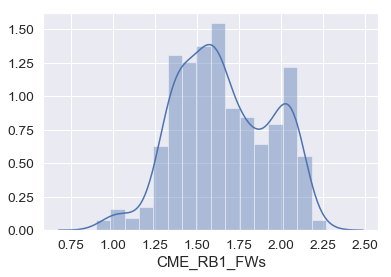

In [384]:
sns.distplot(df_o["CME_RB1_FWs"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


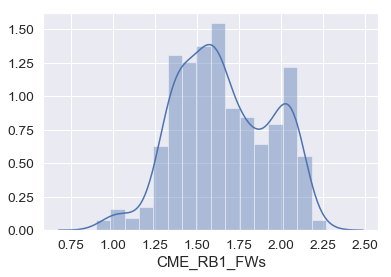

In [385]:
sns.distplot(df_o["CME_RB1_FWs"])

In [386]:
print("Skewness: %f" % df_o["CME_RB1_FWs"].skew())
print("Kurtosis: %f" % df_o['CME_RB1_FWs'].kurt())
print("Skewness: %f" % df_o["CME_RB1_FWs"].skew())
print("Kurtosis: %f" % df_o['CME_RB1_FWs'].kurt())

Skewness: 0.042544
Kurtosis: -0.716245
Skewness: 0.042544
Kurtosis: -0.716245


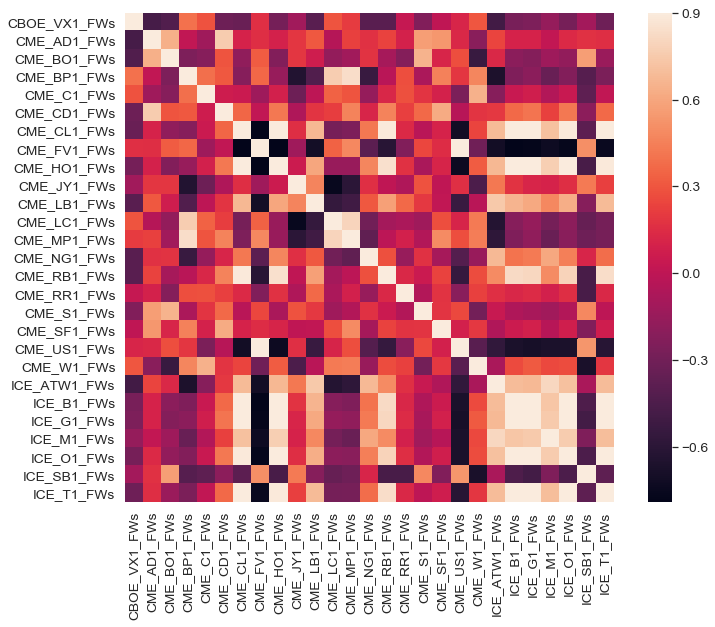

In [387]:
corrmat = df_o.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

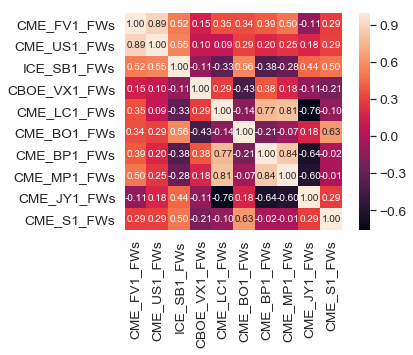

In [18]:
k = 10 #number of variables for heatmap
cols = corrmat.nsmallest(k, 'CME_RB1_FWs')['CME_RB1_FWs'].index
cm = np.corrcoef(a_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

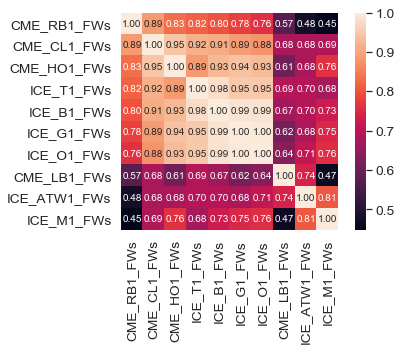

In [19]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'CME_RB1_FWs')['CME_RB1_FWs'].index
cm = np.corrcoef(a_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [397]:
dataset = df_o[cols]
dataset = dataset.values
dataset = dataset.astype('float32')
datasetTest = df_o['CME_RB1_FWs'].values.astype('float32')
datasetTest = datasetTest.reshape(-1,1)
gas_show = df_o['CME_RB1_FWs'].values.astype('float32')

In [398]:
#scale the data, makes the model happy
np.random.seed(7)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# dataset = scaler
datasetTest = scaler.fit_transform(datasetTest)


In [399]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))


692 341


In [400]:
dataTest = datasetTest[train_size:len(datasetTest),:]
dataTestX, dataTestY = create_dataset(dataTest, look_back)
dataTestX = np.reshape(dataTestX, (dataTestX.shape[0], dataTestX.shape[1], 1))


In [401]:
look_back = 15 # sets how many steps out from the current step model is looking, 3 is two days in our timeseries. The current day and two days out.
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [402]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [403]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(500, input_shape=(look_back, 1)))
model.add(Dense(225))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=15, verbose=2)


Epoch 1/100
 - 5s - loss: 0.0070
Epoch 2/100
 - 2s - loss: 0.0026
Epoch 3/100
 - 2s - loss: 0.0023
Epoch 4/100
 - 2s - loss: 0.0022
Epoch 5/100
 - 2s - loss: 0.0019
Epoch 6/100
 - 2s - loss: 0.0019
Epoch 7/100
 - 2s - loss: 0.0022
Epoch 8/100
 - 2s - loss: 0.0020
Epoch 9/100
 - 2s - loss: 0.0021
Epoch 10/100
 - 2s - loss: 0.0018
Epoch 11/100
 - 2s - loss: 0.0019
Epoch 12/100
 - 2s - loss: 0.0019
Epoch 13/100
 - 2s - loss: 0.0019
Epoch 14/100
 - 2s - loss: 0.0019
Epoch 15/100
 - 2s - loss: 0.0020
Epoch 16/100
 - 2s - loss: 0.0020
Epoch 17/100
 - 2s - loss: 0.0017
Epoch 18/100
 - 2s - loss: 0.0030
Epoch 19/100
 - 2s - loss: 0.0020
Epoch 20/100
 - 2s - loss: 0.0023
Epoch 21/100
 - 2s - loss: 0.0018
Epoch 22/100
 - 2s - loss: 0.0018
Epoch 23/100
 - 2s - loss: 0.0017
Epoch 24/100
 - 2s - loss: 0.0017
Epoch 25/100
 - 2s - loss: 0.0017
Epoch 26/100
 - 2s - loss: 0.0019
Epoch 27/100
 - 2s - loss: 0.0021
Epoch 28/100
 - 2s - loss: 0.0025
Epoch 29/100
 - 2s - loss: 0.0020
Epoch 30/100
 - 3s - lo

In [408]:
dataTestX.shape

(1, 15, 325)

In [74]:
model.save('multilstm10.h5') #change file name! lstm_modelCLstep15, lstm_modelCL

In [300]:
model = load_model('multilstm10.h5') #load a model 

In [407]:
testX.shape

(325, 15, 1)

In [404]:
# make predictions
trainPredict = model.predict(trainX, verbose=1)
testPredict = model.predict(testX, verbose=1)
data_test_predict = model.predict(dataTestX, verbose=1)
trainPredct_dataset = np.zeros(shape=(len(trainPredict),10))
trainPredct_dataset[:,0] = trainPredict[:,0]
trainPredict = scaler.inverse_transform(trainPredct_dataset)
# trainY_dataset = np.zeros(shape=(len(trainY),10))
# trainY_dataset[:,0] = trainPredict[:,0]
# trainY = scaler.inverse_transform([trainY])
testPredct_dataset = np.zeros(shape=(len(testPredict),10))
testPredct_dataset[:,0] = testPredict[:,0]
testPredict = scaler.inverse_transform(testPredct_dataset)
# testY = scaler.inverse_transform([testY])
# # calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredict[2])

325/325 [==============================] - 0s 410us/step


ValueError: Error when checking input: expected lstm_13_input to have shape (15, 1) but got array with shape (15, 325)

In [406]:
data_test_predict = model.predict(dataTestX, verbose=1)
data_testpredict = np.zeros(shape=(len(data_test_predict),10))
data_testpredict[:,0] = data_test_predict[:,0]
datatestPredict = scaler.inverse_transform(data_test_predict)


ValueError: Error when checking input: expected lstm_13_input to have shape (15, 1) but got array with shape (15, 325)

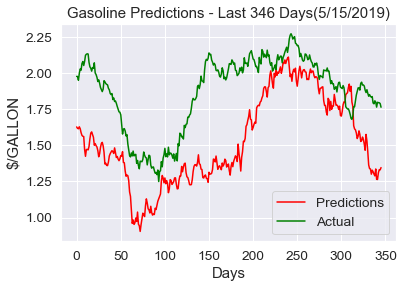

In [263]:
plt.plot(datatrainPredict, color = 'red')
plt.plot(gas_show[:346], color = 'green')
plt.title('Gasoline Predictions - 15 days out(5/15/2019)')
plt.ylabel('$/GALLON')
plt.xlabel('Days')
plt.legend(['Predictions', 'Actual '], loc='lower right')
plt.savefig('lstmmulti_15days.png')
plt.show()

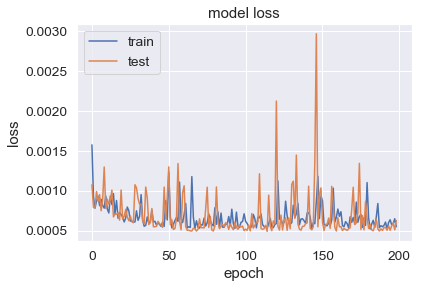

In [73]:

# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [102]:
print((testPredict[2000:2010]),(dataset[8000:8010]))


[[0.3468077 ]
 [0.34272698]
 [0.34951416]
 [0.35562053]
 [0.36356774]
 [0.36121842]
 [0.35494915]
 [0.3511708 ]
 [0.3477213 ]
 [0.35334447]] [[0.2819753 ]
 [0.29702678]
 [0.3059984 ]
 [0.31467345]
 [0.29361615]
 [0.28486696]
 [0.30243942]
 [0.31408027]
 [0.3196412 ]
 [0.30933496]]


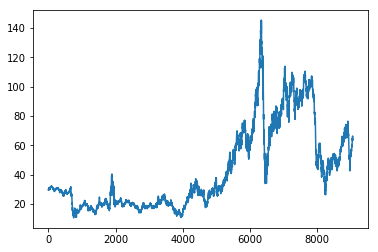

In [348]:
plt.plot(scaler.inverse_transform(dataset))


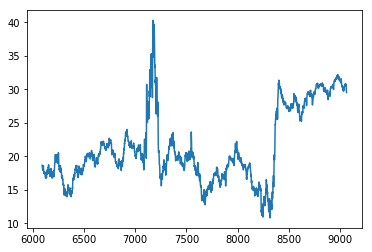

In [319]:
plt.plot(testPredictPlot)


In [438]:
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


Crude Oil Contract - Univariate

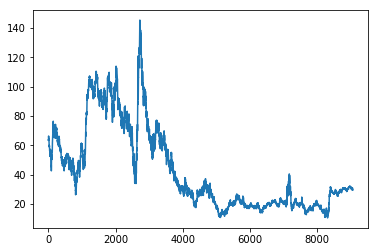